### 11. Search Trees

In this notebook we will look at searching algorithms and sub data structures thatr can let us perform fast search operations. Naive search algorithm can search for value in the data structure in linear time. The data structures we will look at will letr us perform that operation much faster than that.

We previously looked at heaps which are very fast at finding the minimum/maximum value from an evolving set of values. If our usecase is just to find min/max (only one of min/max) values, heaps are very simple yet efficient data structures. If we want to extend our set of operations to the following list *to start with*

- *Search*: Given a key, check if the key exists in the data structure
- *Min/Max*: Find the minimum and maximum (both operations supported on the same datastructure, unlike heap) key
- *Predecessor/Successor*: Given a key, find an object which is the predecessor/successor of the object with given key
- *SortedOutput* : Return the keys in the data structure in sorted order
- *Select*: Given a number i between 1 to n (number of keys in the data structure), return the $i^{th}$ smallest key
- *Rank*: Given a key k, give number of keys in the data structure with keys atmost k.

We will start with a super simple data structure, sorted arrays to implement the above mentioned operation

#### Sorted Arrays


In [1]:
class BinarySearchArray:
    
    def __init__(self, nums):
        self.array = sorted(nums)
        
    def search(self, n):
        
        def search_rec_(left, right):
            if left >= right:
                return None
            else:
                mid = (left + right) // 2
                if self.array[mid] == n:
                    return mid
                elif self.array[mid] > n:
                    return search_rec_(left = left, right = mid)
                else:
                    return search_rec_(left = mid + 1, right = right)    
            
        return search_rec_(left = 0, right = len(self.array))
        
        

    def min_(self):
        return self.array[0]

    def max_(self):        
        return self.array[-1]
    
    def predecessor(self, n):
        idx = self.search(n)
        if idx is not None:
            #This can make the running time linear. The fix if to enhance search to either return 
            #the left most of right most match and not the first match, 
            #this can easily be implemented by continuing to recurse till the left/right
            #of element index we return has a value != n. That way we still have log(n) guarantee. Here we 
            #want to keep the implementation of search simple
            while idx >= 0 and self.array[idx] == n:
                idx -= 1

        return (None, None) if idx is None or idx < 0 else (self.array[idx], idx)
        
    def successor(self, n):
        idx = self.search(n)
        if idx is not None:
            #See comment in predecessor on the linear time worst case and how we can make it logarithmic
            while idx < len(self.array) and self.array[idx] == n:
                idx += 1
        return (None, None) if idx is None or idx == len(self.array) else (self.array[idx], idx)
        
    def sorted_output(self):
        return list(self.array)
    
    def select(self, i):
        return self.array[i - 1] if i > 0 and i <= len(self.array) else None
    
    def rank(self, n):
        idx = self.search(n)
        if idx is not None:
            while idx < len(self.array) and self.array[idx] == n:
                idx += 1
            return idx
        else:
            return None
        

In [2]:
unsorted_array = [5, 3, 8, 2, 5, 1, 7]
a = BinarySearchArray(unsorted_array)

In [3]:
print('Numbers in the array are', a.array)
print('Searching numbers 1 to 10 in the array gives index', [(i, a.search(i)) for i in range(1, 11)])

Numbers in the array are [1, 2, 3, 5, 5, 7, 8]
Searching numbers 1 to 10 in the array gives index [(1, 0), (2, 1), (3, 2), (4, None), (5, 3), (6, None), (7, 5), (8, 6), (9, None), (10, None)]


Notice that we have two 5s in the array and how we return in index of the first one we find when we recursively find. There is no guarantee we will find the first or the last value in search

Lets continue testing remaining operations


In [4]:
print('Predecessor of 1 should be None and we get', a.predecessor(1)[0])
print('Successor of 8 should be None and we get', a.successor(8)[0])
print('Predecessor of 5 should be 3 and we get', a.predecessor(5)[0])
print('Successor of 5 should be 7 and we get', a.successor(5)[0])
print('Sorted output is ', a.sorted_output())
print('Rank of 5 is expected to be 5(as we have 5 numbers <= 5), got', a.rank(5))
print('Rank of 7 is expected to be 6(as we have 6 numbers <= 7), got', a.rank(7))
print('Select 10 should return None, got', a.select(10))
print('Select 6 should return 7 (now how this is reverse of rank), got', a.select(6))
print('Select 5 should return 5 (now how this is reverse of rank), got', a.select(5))

Predecessor of 1 should be None and we get None
Successor of 8 should be None and we get None
Predecessor of 5 should be 3 and we get 3
Successor of 5 should be 7 and we get 7
Sorted output is  [1, 2, 3, 5, 5, 7, 8]
Rank of 5 is expected to be 5(as we have 5 numbers <= 5), got 5
Rank of 7 is expected to be 6(as we have 6 numbers <= 7), got 6
Select 10 should return None, got None
Select 6 should return 7 (now how this is reverse of rank), got 7
Select 5 should return 5 (now how this is reverse of rank), got 5


Lets summarize the running times of our search using sorted arrays in the folowing table

|Operation|Running Time|
|--|--|
|Search|$\theta(log(n))$|
|Min|$\theta(1)$|
|Max|$\theta(1)$|
|Predecessor|$\theta(log(n))$|
|Successor|$\theta(log(n))$|
|SortedOutput|$\theta(n)$|
|Select|$\theta(1)$|
|Rank|$\theta(log(n))$|


Now that we have a working implemention of these 8 operations on arrays which gives is reasonably fast running time, we see there are a couple of issues with Sorted arrays. Many real world applications are dynamic in nature and supporting insertion and deletion of elements is curcial. Inserting and deleting elements from Sorted array is linear time operation in the best case and thus we will need a different data structure to handle dynamic data.

We will now look at Search trees.

#### Search Trees

Search Trees will achieve all operations in $\theta(log(n))$ time except sorted output which will run in $\theta(n)$ time.

Following table summarizes the running times

|Operation|Sorted Array|*Balanced* Search Tree|
|--|--|--|
|Search|$\theta(log(n))$|$\theta(log(n))$|
|Min|$\theta(1)$|$\theta(log(n))$|
|Max|$\theta(1)$|$\theta(log(n))$|
|Predecessor|$\theta(log(n))$|$\theta(log(n))$|
|Successor|$\theta(log(n))$|$\theta(log(n))$|
|SortedOutput|$\theta(n)$|$\theta(n)$|
|Select|$\theta(1)$|$\theta(log(n))$|
|Rank|$\theta(log(n))$|$\theta(log(n))$|
|**Insert**|$\theta(n)$|$\theta(log(n))$|
|**Delete**|$\theta(n)$|$\theta(log(n))$|


The search tree running time guarantees are for balances binary tree.

Implementing self balancing trees is not trivial and our initial implementation will not be looking to implement self balancing trees but rely on the fact that the numbers being added to the tree are not sorted and random in nature.

---

Following is an implementation of non self balancing BinarySearchTree

In [5]:
class BinarySearchTree:
    
    class Node:
        
        def __init__(self, v):
            #Stores reference of the parent node, None if the node is root
            self.parent = None
            #Stores reference of left sub tree
            self.left = None
            #Stores reference of right sub tree            
            self.right = None
            #Instead of inserting multiple nodes for same value, we just increment the count
            self.count = 1
            #Maintains the size of the left tree and right tree, total 
            #tree size is left_size + right_size + coun, this is slightly different implementation then that 
            #given in the book
            self.left_size = 0
            self.right_size = 0          
            #The value of the node
            self.value = v
            
    
    def __init__(self):
        self.root = None
        
    def __search__(self, current, n, rank = 0):
            if current is None:
                return None, None
            elif current.value == n:
                return current, rank + current.left_size + current.count
            elif current.value > n:
                return self.__search__(current.left, n, rank)
            else:
                return self.__search__(current.right, n, rank + current.count + current.left_size)
            
    def __min__(self, node):
        if node is None:
            return None
        if node.left is None:
            return node
        else:
            return self.__min__(node.left)
            
    def __max__(self, node):
        if node is None:
            return None
        if node.right is None:
            return node
        else:
            return self.__max__(node.right)
        
    def __delete__(self, node):
        if node is not None:
            #Case 1: If node is None/node not present in tree, take no further action, else check
            # if we have multiple instances of this value, if yes simply decrement the counter
            if node.count > 1:
                node.count -= 1
            else:
                if node.left is None and node.right is None:
                    #Case 2: Node to be deleted is a leaf node (it being a root with no children is a special case)
                    if self.root == node:
                        self.root = None
                    else:
                        if node == node.parent.left:
                            node.parent.left = None
                        else:
                            node.parent.right = None

                elif node.left is None or node.right is None:
                    #Case 3: Node has One child (again , there is a special case when node is root)
                    child = node.left if node.right is None else node.right
                    if node.parent is None:
                        self.root = child
                        child.parent = None
                    else:
                        child.parent = node.parent
                        if node == node.parent.left:
                            node.parent.left  = child
                        else:
                            node.parent.right = child
                else:
                    #Case 4, complex case, the node to be deleted has two children
                    # We swap the node with the maximum of the left tree. Any maximum node will have no right child
                    # Also, replacing the node with the maximum of the left tree (also the predecessor of this node)
                    #doesn not violate the tree except by swapping the node with the predecessor, we push the violation 
                    #down in the tree. But deleting node from this position is easy as we now reduce this case to 
                    #Case 2 or Case 3

                    #4a, Find the predecessor/max of left tree
                    new_node = self.__max__(node.left)

                    #4b Swap position of node and the predecessor
                    left, right, parent = node.left, node.right, node.parent


                    #new_node.right will always be None
                    node.left, node.right = new_node.left, new_node.right
                    new_node.right = right
                    if left == new_node:
                        new_node.left = node
                        node.parent = new_node
                    else:
                        new_node.left = left
                        node.parent = new_node.parent

                    if left is not None:
                        left.parent = new_node
                    if right is not None:
                        right.parent = new_node


                    #Special case if node was the root
                    new_node.parent = parent                
                    if parent is None:
                        self.root = new_node
                    else:
                        if node == parent.left:
                            parent.left = new_node
                        else:
                            parent.right = new_node

                    #4c, delete this node now recursively. This time the call will be for case 2/3
                    self.__delete__(node)
                
            
    def __insert__(self, current, v, parent, isLeft):
            if current is None:
                n = self.Node(v)
                n.parent = parent
                if isLeft:
                    parent.left = n
                else:
                    parent.right = n
            else:
                if v == current.value:
                    current.count += 1
                elif v < current.value:
                    current.left_size += 1
                    self.__insert__(current.left, v, current, True)
                else:
                    current.right_size += 1
                    self.__insert__(current.right, v, current, False) 
        
    def insert(self, v):
        if self.root is None:
            self.root = self.Node(v)
        else:
            self.__insert__(self.root, v, None, None)


                
        
        
    def delete(self, v):
        node = self.__search__(self.root, v)[0]
        self.__delete__(node)
        
    def search(self, n): 
        return self.__search__(self.root, n)[0]

        
    def min_(self):
        return None if self.root is None else self.__min__(self.root).value

        
    def max_(self):
        return None if self.root is None else self.__max__(self.root).value
    
    def predecessor(self, n):
        node = self.search(n)
        if node is not None:
            if node.left is None:
                while node.parent is not None and node == node.parent.left:
                    node = node.parent
                
                if node.parent is None:
                    #Case when we are trying to find the predecessor of minimum
                    return None
                else:
                    return node.parent.value
            else:
                return self.__max__(node.left).value
        else:
            return None
            
        
    def successor(self, n):
        node = self.search(n)
        if node is not None:
            if node.right is  None:
                while node.parent is not None and node == node.parent.right:
                    node = node.parent
                    
                if node.parent is None:
                    #The value we are intend to find successor for is the max value
                    return None
                else:
                    return node.parent.value
            else:
                return self.__min__(node.right).value
        else:
            return None

    def sorted_output(self):
        res = []
        def inorder_(node):
            if node is not None:
                inorder_(node.left)
                res.extend([node.value] * node.count)
                inorder_(node.right)
        inorder_(self.root)
        return res
    
    def select(self, i):
        def select_(node, rank):
            if node is None:
                return None
            elif rank <= node.left_size:
                return select_(node.left, rank)
            elif rank > node.left_size + node.count:
                return select_(node.right, rank - node.left_size - node.count)
            else:
                return node.value
        return select_(self.root, i)
    
    def rank(self, n):
        _, r = self.__search__(self.root, n)
        return r

In [6]:
bst = BinarySearchTree()
bsa = BinarySearchArray(unsorted_array)
for i in unsorted_array:
    bst.insert(i)
print('Searching numbers 1 to 10 in the Tree gives', [(i, bst.search(i) is not None) for i in range(1, 11)])
print('\nSearching numbers 1 to 10 in the Array gives', [(i, bsa.search(i) is not None) for i in range(1, 11)])

Searching numbers 1 to 10 in the Tree gives [(1, True), (2, True), (3, True), (4, False), (5, True), (6, False), (7, True), (8, True), (9, False), (10, False)]

Searching numbers 1 to 10 in the Array gives [(1, True), (2, True), (3, True), (4, False), (5, True), (6, False), (7, True), (8, True), (9, False), (10, False)]



As we see above, the binary search tree and search array gives identical results on searching.

In [7]:
print('Minimum in BinarySearchArray is', bsa.min_(), ', minimum in BinarySearchTree is', bst.min_())
print('Maximum in BinarySearchArray is', bsa.max_(), ', maximum in BinarySearchTree is', bst.max_())
print("=" * 100)
print('Predecessors using BinarySearchArray of elements are', 
      [(i, bsa.predecessor(i)[0]) for i in unsorted_array])
print('Predecessors using BinarySearchArray of elements are', 
      [(i, bst.predecessor(i)) for i in unsorted_array])
print("=" * 100)
print('Successor using BinarySearchArray of elements are', 
      [(i, bsa.successor(i)[0]) for i in unsorted_array])

print('Successor using BinarySearchArray of elements are', 
      [(i, bst.successor(i)) for i in unsorted_array])

print("=" * 100)
print('Sorted output using BinarySearchArray for all elements give', bsa.sorted_output())
print('Sorted output using BinarySearchTree for all elements give', bst.sorted_output())

print("=" * 100)
print('select using BinarySearchArray from 1 to 8 gives', 
      [(i, bsa.select(i)) for i in range(1, 9)])
print('select using BinarySearchTree from 1 to 8 gives', 
      [(i, bst.select(i)) for i in range(1, 9)])

print("=" * 100)
print('rank using BinarySearchArray for elements are', 
      [(i, bsa.rank(i)) for i in unsorted_array])
print('rank using BinarySearchTree for elements are', 
      [(i, bst.rank(i)) for i in unsorted_array])



Minimum in BinarySearchArray is 1 , minimum in BinarySearchTree is 1
Maximum in BinarySearchArray is 8 , maximum in BinarySearchTree is 8
Predecessors using BinarySearchArray of elements are [(5, 3), (3, 2), (8, 7), (2, 1), (5, 3), (1, None), (7, 5)]
Predecessors using BinarySearchArray of elements are [(5, 3), (3, 2), (8, 7), (2, 1), (5, 3), (1, None), (7, 5)]
Successor using BinarySearchArray of elements are [(5, 7), (3, 5), (8, None), (2, 3), (5, 7), (1, 2), (7, 8)]
Successor using BinarySearchArray of elements are [(5, 7), (3, 5), (8, None), (2, 3), (5, 7), (1, 2), (7, 8)]
Sorted output using BinarySearchArray for all elements give [1, 2, 3, 5, 5, 7, 8]
Sorted output using BinarySearchTree for all elements give [1, 2, 3, 5, 5, 7, 8]
select using BinarySearchArray from 1 to 8 gives [(1, 1), (2, 2), (3, 3), (4, 5), (5, 5), (6, 7), (7, 8), (8, None)]
select using BinarySearchTree from 1 to 8 gives [(1, 1), (2, 2), (3, 3), (4, 5), (5, 5), (6, 7), (7, 8), (8, None)]
rank using BinarySea

---

As we see above we have checked results of all operations except `delete`. All the results we get for `BinarySearchTree` match our results for `BinarySearchArray`.

We will now test the delete functionality of `BinarySearchTree`. We will delete one by one elements from the tree and then check existance of elements in the tree.

---

In [8]:
#TODO: Finish off delete
to_delete = list(reversed(unsorted_array))
size_ = bst.root.count + bst.root.left_size + bst.root.right_size
print("Before deletion sorted gives", bst.sorted_output(),'tree size is', size_)
print()
while to_delete:    
    del_ = to_delete.pop()
    print("="* 100)
    bst.delete(del_)
    size_ = (bst.root.count + bst.root.left_size + bst.root.right_size) if bst.root is not None else 0
    print("After deleting", del_, "sorted tree gives", bst.sorted_output(), 'tree size is', size_)

#unsorted_array, bst.root.value

Before deletion sorted gives [1, 2, 3, 5, 5, 7, 8] tree size is 7

After deleting 5 sorted tree gives [1, 2, 3, 5, 7, 8] tree size is 6
After deleting 3 sorted tree gives [1, 2, 5, 7, 8] tree size is 6
After deleting 8 sorted tree gives [1, 2, 5, 7] tree size is 6
After deleting 2 sorted tree gives [1, 5, 7] tree size is 6
After deleting 5 sorted tree gives [1, 7] tree size is 1
After deleting 1 sorted tree gives [7] tree size is 1
After deleting 7 sorted tree gives [] tree size is 0



---

**Quiz 11.1**

Node x has children y and z, the answer is **(c)**, *size(x) = size(y) + size(z) + 1*

---


#### Balanced Binary Search Tree

A binary search tree has a guaranteed running time of $\theta(log(n))$ running time for all operations (except ``SortedOutput``) only when the tree is balanced. Order of insertion in a binary tree without self balancing decides the time complexity of the operations. 

In [9]:
def draw_tree(root):
    # root is a Node which has three attributes, left, right and value
    import networkx as nx  
    from networkx.drawing.nx_agraph import write_dot, graphviz_layout
    import matplotlib.pyplot as plt
    
    # Convert the list to adjlist like structure which we will use to plot
    from collections import defaultdict
    nodes = defaultdict(list)
    def to_list(node):
        if node:
            if node.left:
                nodes[node.value].append(node.left.value)
            if node.right:
                nodes[node.value].append(node.right.value)
            
            to_list(node.left)
            to_list(node.right)
    
    to_list(root)
    #print(nodes)
    
    G = nx.DiGraph()
    added = set()
    for n in nodes:
        if n not in added:
            G.add_node(n)
        added.add(n)
        if n in nodes:
            for children in nodes[n]:
                if n not in added:
                    G.add_node(children)

                added.add(children)
                G.add_edge(n, children)

    write_dot(G,'test.dot')
    # same layout using matplotlib with no labels
    pos=graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

Consider adding elements in a tree in sorted order (ascending or descending). First, we will create a tree from sorted elements and then the same elements inserted in a different order

In [10]:
sorted_element = [0, 1, 2, 3, 4, 5, 6]
tree = BinarySearchTree()
for v in sorted_element:
    tree.insert(v)

draw_tree(tree.root)

<Figure size 640x480 with 1 Axes>

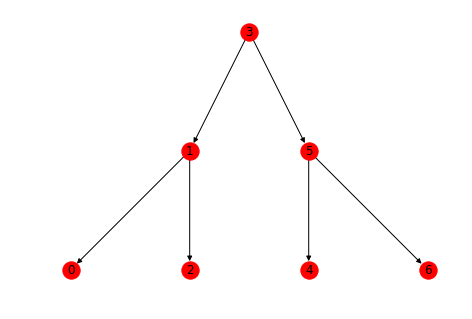

In [11]:
sorted_element = [3, 1, 5, 0, 2, 4, 6]
tree = BinarySearchTree()
for v in sorted_element:
    tree.insert(v)

draw_tree(tree.root)


Searching any element in the first tree will have $\theta(n)$ complexity as it is nothing but a linked list, where as the second tree will have the worst case complexity of $\theta(log(n))$

It is however possible to ensure the tree stays balanced by rebalancing the nodes in it to ensure the height does not exceed $\theta(log(n))$. Couple of such trees are 

- AVL Trees
- Red Black Trees.

We will first look at AVL trees and see how this self balancing is done. All methods of our previously implemented ``BinarySearchTree`` will work just fine, except that after insert, there will be rebalancing that will be performed.

We will start by introducting few cases and some what we will do to achieve

---

**1) Left Left Case.**

This case occurs when the nodes left child has depth 2 greater than right and the left child is either balanced or left heavy. In this case we need to perform the following rotation.

Consider the following (sub)tree. As we can see, the tree is left heavy. If we make 3 as the root with 5 and 4 on its right (4 being left child of 5) and keep 1 as is, it should get balanced. 

---

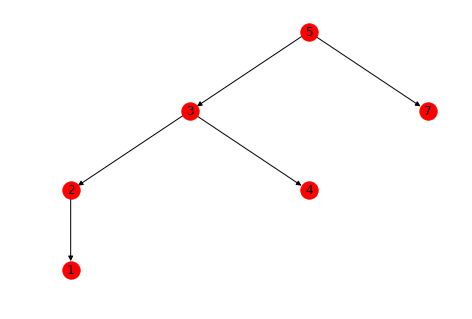

In [12]:
sorted_element = [5, 3, 4, 2, 7, 1]
# Note how adding 1 to the tree causes the imbalance
tree = BinarySearchTree()
for v in sorted_element:
    tree.insert(v)
draw_tree(tree.root)

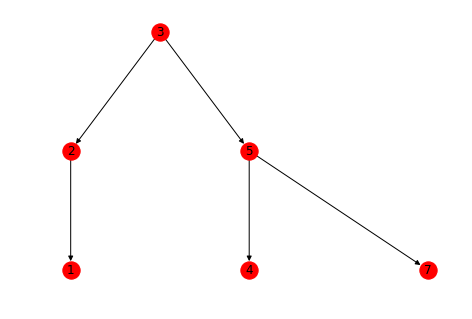

In [13]:
def left_left(node):
    
    # In above case, node is the 5 and new_root becomes 3
    new_root = node.left
    # Set parent of 3 as the parent of 5
    new_root.parent = node.parent
    # Set parent of 5 as 3 as 5 becomes the right child of 3
    node.parent = new_root
    # Set right node of 3, 4 in this case as left of 5 and set its parent to too
    node.left = new_root.right
    if new_root.right:
        new_root.right.parent = node
        
    #Finally, set 3's right child to 5
    new_root.right = node
    
    return new_root

new_root = left_left(tree.root)
draw_tree(new_root)


---

**2) Left Right Case.**

This case happens when the height of left child becomes 2 greater than right and the left child is right heavy
Consider the following tree

---

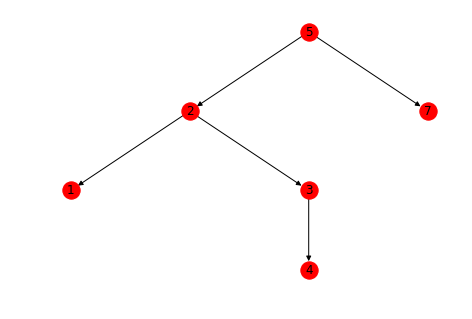

In [14]:
sorted_element = [5, 2, 3, 1, 7, 4]
# See how adding 4 causes the tree to become imbalanced
tree = BinarySearchTree()
for v in sorted_element:
    tree.insert(v)
draw_tree(tree.root)

Above case (graph does not look pretty)  but we can see the max height on left of 5 if 3 and where as on its right its 1. Once we added 4, the tree becomes imbalanced.

If we look carefully, we can change this left right case to left left, by making 3 5's left child and 2 as 3s left child and then solve left left case which we know how to fix.

In [15]:
def left_right(node):
    # In above case, node is the 5 and new_root becomes 3
    # Since this is left right case, we are guaranteed to have left and right node (5 -> 2 -> 3) in this case

    # This represents node 2
    left = node.left
    # make right of this left (3 in this case) as left child of node and set its parent accordingly
    node.left = left.right
    new_left = node.left
    node.left.parent = node
    
    # Make left of this left-right node, 3 in this case as right of left (2). This will not violate 
    # anything as anything on the right of a node is already larger than it, also set its parent accordingly
    l = new_left.left
    left.right = l
    if l:
        # As this can be None w eneed the check
        l.parent= left
    
    new_left.left = left
    left.parent = new_left
    
    # At this point we have made our tree from left-right to left-left, now use left-left to resolve    
    return left_left(node)
    
    


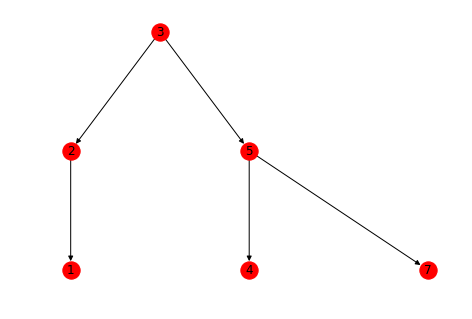

In [16]:
new_root = left_right(tree.root)
draw_tree(new_root)

---

**3) Right Right case**

---